# Homework - 04

## Regression in Python

This file shows how do daily opening prices, trading volumes, and historical trends influence the adjusted closing prices of stocks

#### Author: Sanjay Bhargav Siddi

Importing packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

Big Tech Stock Prices dataset

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2023/2023-02-07/big_tech_stock_prices.csv', header='infer')
data
df = pd.DataFrame(data)
df

,stock_symbol,date,open,high,low,close,adj_close,volume
0,AAPL,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,AAPL,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526476,601904800
2,AAPL,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,AAPL,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410790,477131200
4,AAPL,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800
...,...,...,...,...,...,...,...,...
45083,TSLA,2022-12-22,136.000000,136.630005,122.260002,125.349998,125.349998,210090300
45084,TSLA,2022-12-23,126.370003,128.619995,121.019997,123.150002,123.150002,166989700
45085,TSLA,2022-12-27,117.500000,119.669998,108.760002,109.099998,109.099998,208643400
45086,TSLA,2022-12-28,110.349998,116.269997,108.239998,112.709999,112.709999,221070500


Taking the 'open' prices as feature and 'adj_close' price as target

In [4]:
X = df[['open']]
y = df['adj_close']

Spltting the dataset into training and test data

In [5]:
# number of rows
numInstances = df.shape[0]

numTrain = 10000   # number of training instances
numTest = numInstances - numTrain # number of testing instances

X_train = X[:-numTest]
X_test = X[-numTest:]
y_train = y[:-numTest]
y_test = y[-numTest:]

Creating a linear regression model and fitting it to the training set and applying it to the test set

In [7]:
# Creating a linear regression object
regr = linear_model.LinearRegression()

# Fitting a regression model to the training set
regr.fit(X_train, y_train)

# Applying a model to the test set
y_pred_test = regr.predict(X_test)

Plotting the true vs predicted values 

Root mean squared error = 12.6258
R-squared = 0.9816


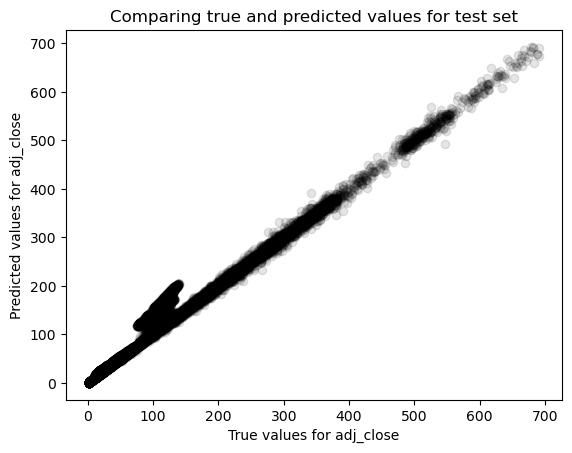

In [10]:

# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black', alpha=0.1)
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for adj_close')
plt.ylabel('Predicted values for adj_close')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

This plot has an almost perfect diagonal line (with some sort of bump at the start) indicating that it is making consistent predictions. The prediction values for 'adj_close' increases as the true values increase.

Slope =  1.001640572867305
Intercept =  -0.768128043318498


Text(0, 0.5, ' y = adj_close')

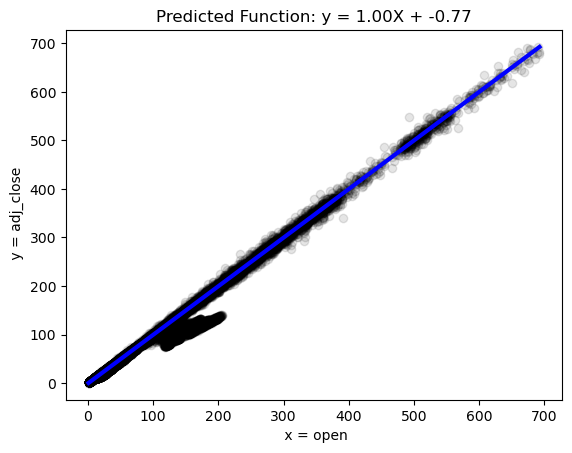

In [12]:
# Display model parameters
print('Slope = ', regr.coef_[0])
print('Intercept = ', regr.intercept_)


# Plot outputs
plt.scatter(X_test, y_test, color='black', alpha=0.1)
plt.plot(np.sort(X_test.values.flatten()), np.sort(y_pred_test), color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (regr.coef_[0], regr.intercept_)
plt.title(titlestr)
plt.xlabel(' x = open')
plt.ylabel(' y = adj_close')

The blue line represents the true function y = 1.00X - 0.77.

Creating correlated attributes according to the problem statement. So we will have the features - open, volume, low, high and the target as adj_close

In [14]:
X2 = df[['volume']]
X3 = df[['low']]
X4 = df[['high']]

Finding correlation among the features and representing them by scatter plots

Text(0.5, 1.0, 'Correlation between low and high = 0.9998')

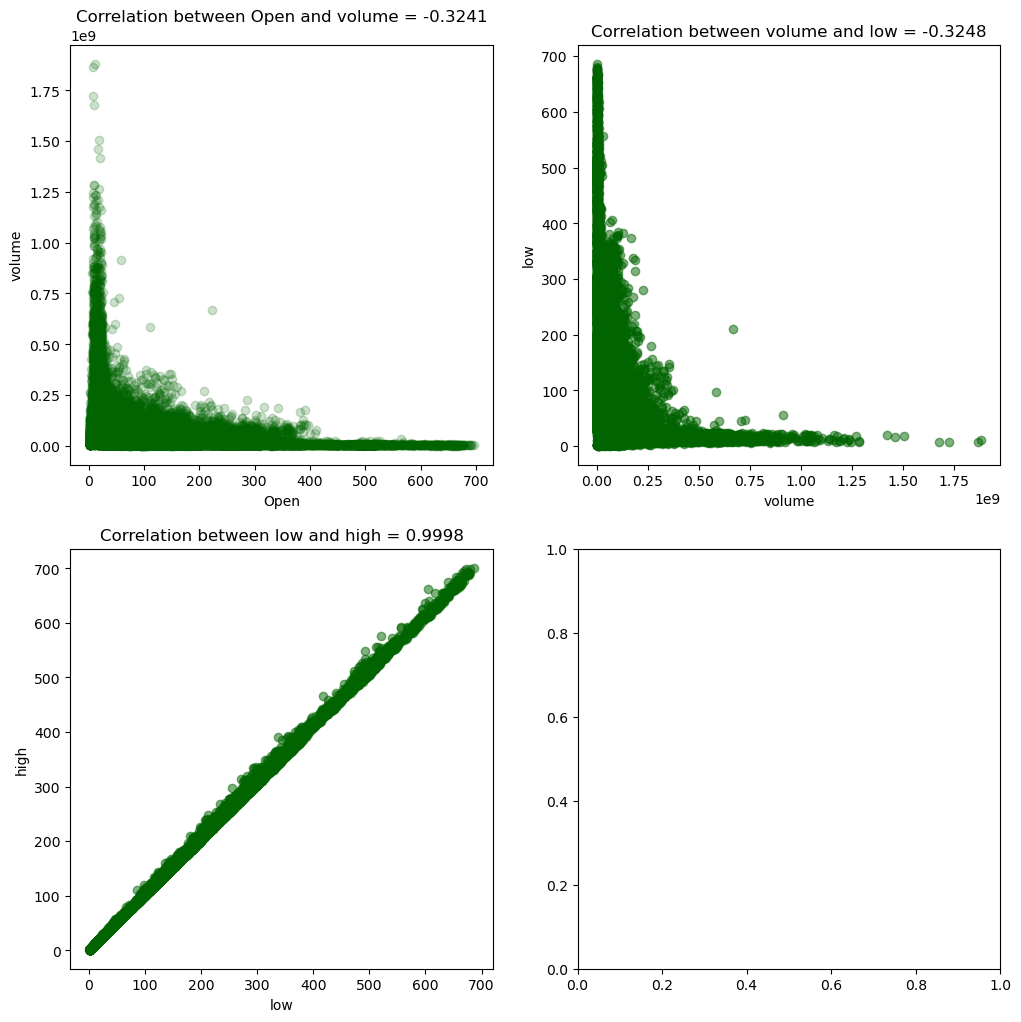

In [19]:
fig, ((ax1, ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(12,12))
ax1.scatter(X, X2, color='darkgreen', alpha=0.2)
ax1.set_xlabel('Open')
ax1.set_ylabel('volume')
c = np.corrcoef(np.column_stack((X[:-numTest],X2[:-numTest])).T)
titlestr = 'Correlation between Open and volume = %.4f' % (c[0,1])
ax1.set_title(titlestr)

ax2.scatter(X2, X3, color='darkgreen', alpha=0.5)
ax2.set_xlabel('volume')
ax2.set_ylabel('low')
c = np.corrcoef(np.column_stack((X2[:-numTest],X3[:-numTest])).T)
titlestr = 'Correlation between volume and low = %.4f' % (c[0,1])
ax2.set_title(titlestr)

ax3.scatter(X3, X4, color='darkgreen', alpha=0.5)
ax3.set_xlabel('low')
ax3.set_ylabel('high')
c = np.corrcoef(np.column_stack((X3[:-numTest],X4[:-numTest])).T)
titlestr = 'Correlation between low and high = %.4f' % (c[0,1])
ax3.set_title(titlestr)


From the three plots, we can observe the following:
1. There is a weak negative correlation between opening prices and volume (as the volume increases, the opening price decreases)
2. Weak negative correlation between low price and volume (as the low price increases, the volume tends to decrease)
3. A high positive correlation between high price and low price (as the low price increases, the high price tends to increase)

In [15]:
# Creating 3 additional versions of the training and test sets
X_train2 = np.column_stack((X[:-numTest],X2[:-numTest]))
X_test2 = np.column_stack((X[-numTest:],X2[-numTest:]))
X_train3 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest]))
X_test3 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:]))
X_train4 = np.column_stack((X[:-numTest],X2[:-numTest],X3[:-numTest],X4[:-numTest]))
X_test4 = np.column_stack((X[-numTest:],X2[-numTest:],X3[-numTest:],X4[-numTest:]))

The first version, X_train2 and X_test2 have 2 correlated predictor variables, X and X2. 
The second version, X_train3 and X_test3 have 3 correlated predictor variables, X, X2, and X3. 
The third version have 4 correlated variables X, X2, X3, and X4.

In [17]:
# Training 3 new regression models based on the 4 versions of training and test data created in the previous step.
regr2 = linear_model.LinearRegression()
regr2.fit(X_train2, y_train)

regr3 = linear_model.LinearRegression()
regr3.fit(X_train3, y_train)

regr4 = linear_model.LinearRegression()
regr4.fit(X_train4, y_train)

LinearRegression()

Applying the above 3 regression models to the training and test sets

In [19]:
y_pred_train = regr.predict(X_train)
y_pred_test = regr.predict(X_test)
y_pred_train2 = regr2.predict(X_train2)
y_pred_test2 = regr2.predict(X_test2)
y_pred_train3 = regr3.predict(X_train3)
y_pred_test3 = regr3.predict(X_test3)
y_pred_train4 = regr4.predict(X_train4)
y_pred_test4 = regr4.predict(X_test4)

Computing both the training and test errors of the models for postprocessing

,Model,Train error,Test error,Sum of Absolute Weights
0,1.00 X + -0.77,2.899938,12.625783,1.769769
1,1.00 X + -0.00 X2 + -0.20,2.843236,12.741173,1.204344
2,0.02 X + -0.00 X2 + 1.00 X3 + -0.43,2.046859,12.872198,0.443752
3,-0.64 X + -0.00 X2 + 0.76 X3 + 0.87 X4 + -0.30,1.435319,12.569811,0.940385


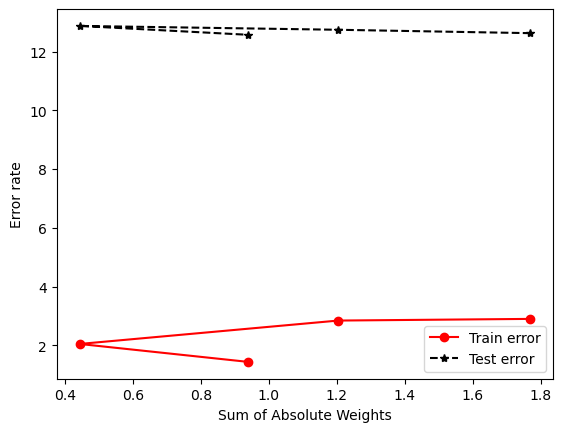

In [20]:
columns = ['Model', 'Train error', 'Test error', 'Sum of Absolute Weights']
model1 = "%.2f X + %.2f" % (regr.coef_[0], regr.intercept_)
values1 = [ model1, np.sqrt(mean_squared_error(y_train, y_pred_train)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test)),
           np.absolute(regr.coef_).sum() + np.absolute(regr.intercept_)]

model2 = "%.2f X + %.2f X2 + %.2f" % (regr2.coef_[0], regr2.coef_[1], regr2.intercept_)
values2 = [ model2, np.sqrt(mean_squared_error(y_train, y_pred_train2)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test2)),
           np.absolute(regr2.coef_[0]).sum() + np.absolute(regr2.intercept_)]

model3 = "%.2f X + %.2f X2 + %.2f X3 + %.2f" % (regr3.coef_[0], regr3.coef_[1], 
                                                regr3.coef_[2], regr3.intercept_)
values3 = [ model3, np.sqrt(mean_squared_error(y_train, y_pred_train3)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test3)),
           np.absolute(regr3.coef_[0]).sum() + np.absolute(regr3.intercept_)]

model4 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f" % (regr4.coef_[0], regr4.coef_[1], 
                                        regr4.coef_[2], regr4.coef_[3], regr4.intercept_)
values4 = [ model4, np.sqrt(mean_squared_error(y_train, y_pred_train4)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test4)),
           np.absolute(regr4.coef_[0]).sum() + np.absolute(regr4.intercept_)]


results = pd.DataFrame([values1, values2, values3, values4], columns=columns)

plt.plot(results['Sum of Absolute Weights'], results['Train error'], 'ro-')
plt.plot(results['Sum of Absolute Weights'], results['Test error'], 'k*--')
plt.legend(['Train error', 'Test error'])
plt.xlabel('Sum of Absolute Weights')
plt.ylabel('Error rate')

results

The plot illustrates the trade-off between the sum of absolute weights of the models and their corresponding training and test errors for polynomial regression models of degrees 1 to 4
The training error is represented by red circles, and the test error is represented by black asterisks.
Model 3 has the lowest test error (12.569811), making it the best-performing model among others, and also the sum of absolute weights for it is moderate (0.940385) which suggests a balance between the model complexity and performance.

## 4.4 Ridge Regression

Ridge regression is a variant of MLR designed to fit a linear model to the dataset by minimizing the following regularized least-square loss function:
$$L_{\textrm{ridge}}(y,f(X,w)) = \sum_{i=1}^N \|y_i - X_iw - w_0\|^2 + \alpha \bigg[\|w\|^2 + w_0^2 \bigg],$$
where $\alpha$ is the hyperparameter for ridge regression. Note that the ridge regression model reduces to MLR when $\alpha = 0$. By increasing the value of $\alpha$, we can control the complexity of the model as will be shown in the example below. 

Fitting a ridge regression model to the previously created training set with correlated attributes.

In [21]:
from sklearn import linear_model

ridge = linear_model.Ridge(alpha=10)
ridge.fit(X_train4, y_train)
y_pred_train_ridge = ridge.predict(X_train4)
y_pred_test_ridge = ridge.predict(X_test4)

model5 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f" % (ridge.coef_[0], 
                                        ridge.coef_[1], ridge.coef_[2], 
                                        ridge.coef_[3], ridge.intercept_)
values5 = [ model5, np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),
           np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_)]

# Comparing the results of the ridge regression model against those obtained using MLR.
ridge_results = pd.DataFrame([values5], columns=columns, index=['Ridge'])
pd.concat([results, ridge_results])

,Model,Train error,Test error,Sum of Absolute Weights
0,1.00 X + -0.77,2.899938,12.625783,1.769769
1,1.00 X + -0.00 X2 + -0.20,2.843236,12.741173,1.204344
2,0.02 X + -0.00 X2 + 1.00 X3 + -0.43,2.046859,12.872198,0.443752
3,-0.64 X + -0.00 X2 + 0.76 X3 + 0.87 X4 + -0.30,1.435319,12.569811,0.940385
Ridge,-0.64 X + -0.00 X2 + 0.76 X3 + 0.87 X4 + -0.30,1.435319,12.569823,0.939711


The alpha value controls the sum of absolute weights which can help produce a test error similar to that of multiple linear regression with no correlated attributes.

## 5.5 Lasso Regression

One of the limitations of ridge regression is that, although it was able to reduce the regression coefficients associated with the correlated attributes and reduce the effect of model overfitting, the resulting model is still not sparse. Another variation of MLR, called lasso regression, is designed to produce sparser models by imposing an $\ell_1$ regularization on the regression coefficients as shown below:
$$L_{\textrm{lasso}}(y,f(X,w)) = \sum_{i=1}^N \|y_i - X_iw - w_0\|^2 + \alpha \bigg[ \|w\|_1 + |w_0|\bigg]$$ 

Applying lasso regression to the previously used correlated dataset

In [22]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=0.02)
lasso.fit(X_train4, y_train)
y_pred_train_lasso = lasso.predict(X_train4)
y_pred_test_lasso = lasso.predict(X_test4)

model6 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f" % (lasso.coef_[0], 
                                        lasso.coef_[1], lasso.coef_[2], 
                                        lasso.coef_[3], lasso.intercept_)
values6 = [ model6, np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
           np.absolute(lasso.coef_[0]).sum() + np.absolute(lasso.intercept_)]

lasso_results = pd.DataFrame([values6], columns=columns, index=['Lasso'])
pd.concat([results, ridge_results, lasso_results])

,Model,Train error,Test error,Sum of Absolute Weights
0,1.00 X + -0.77,2.899938,12.625783,1.769769
1,1.00 X + -0.00 X2 + -0.20,2.843236,12.741173,1.204344
2,0.02 X + -0.00 X2 + 1.00 X3 + -0.43,2.046859,12.872198,0.443752
3,-0.64 X + -0.00 X2 + 0.76 X3 + 0.87 X4 + -0.30,1.435319,12.569811,0.940385
Ridge,-0.64 X + -0.00 X2 + 0.76 X3 + 0.87 X4 + -0.30,1.435319,12.569823,0.939711
Lasso,0.78 X + -0.00 X2 + 0.23 X3 + -0.01 X4 + -0.28,2.559879,12.753735,1.058981


The lasso regression tries to induce a sparsity by setting the coefficients close to zero. Due to this information is lost and there is an increase in the test error (12.753735) when compared to Ridge regression.

## 4.6 Hyperparameter Selection via Cross-Validation

Demonstrating how to use a 5-fold cross-validation method to select the best hyperparameter of the model
In the first sample code below, we vary the hyperparameter $\alpha$ for ridge regression to a range between 1 and 500. Using the RidgeCV() function, we can train a model with 5-fold cross-validation and select the best hyperparameter value. 

Varying the hyperparameter for ridge regression to a range between 1 and 500

In [29]:
from sklearn import linear_model

ridge = linear_model.RidgeCV(cv=5,alphas=[1, 10, 50, 100, 500, 1000])
ridge.fit(X_train4, y_train)
y_pred_train_ridge = ridge.predict(X_train4)
y_pred_test_ridge = ridge.predict(X_test4)

model6 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f" % (ridge.coef_[0], 
                                        ridge.coef_[1], ridge.coef_[2], 
                                        ridge.coef_[3], ridge.intercept_)
values6 = [ model6, np.sqrt(mean_squared_error(y_train, y_pred_train_ridge)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_ridge)),
           np.absolute(ridge.coef_[0]).sum() + np.absolute(ridge.intercept_)]
print("Selected alpha = %.2f" % ridge.alpha_)

ridge_results = pd.DataFrame([values6], columns=columns, index=['RidgeCV'])
pd.concat([results, ridge_results])

Selected alpha = 1.00


,Model,Train error,Test error,Sum of Absolute Weights
0,1.00 X + -0.77,2.899938,12.625783,1.769769
1,1.00 X + -0.00 X2 + -0.20,2.843236,12.741173,1.204344
2,0.02 X + -0.00 X2 + 1.00 X3 + -0.43,2.046859,12.872198,0.443752
3,-0.64 X + -0.00 X2 + 0.76 X3 + 0.87 X4 + -0.30,1.435319,12.569811,0.940385
RidgeCV,-0.64 X + -0.00 X2 + 0.76 X3 + 0.87 X4 + -0.30,1.435319,12.569813,0.940318


Illustrating how to apply cross-validation to select the best hyperparameter value for fitting a lasso regression model. 

In [28]:
from sklearn import linear_model

lasso = linear_model.LassoCV(cv=5, alphas=[0.01, 0.02, 0.05, 0.1, 0.3, 0.5, 1.0])
lasso.fit(X_train4, y_train)
y_pred_train_lasso = lasso.predict(X_train4)
y_pred_test_lasso = lasso.predict(X_test4)

model7 = "%.2f X + %.2f X2 + %.2f X3 + %.2f X4 + %.2f" % (lasso.coef_[0], 
                                        lasso.coef_[1], lasso.coef_[2], 
                                        lasso.coef_[3], lasso.intercept_)
values7 = [ model7, np.sqrt(mean_squared_error(y_train, y_pred_train_lasso)), 
           np.sqrt(mean_squared_error(y_test, y_pred_test_lasso)),
           np.absolute(lasso.coef_[0]).sum() + np.absolute(lasso.intercept_)]
print("Selected alpha = %.2f" % lasso.alpha_)

lasso_results = pd.DataFrame([values7], columns=columns, index=['LassoCV'])
pd.concat([results, ridge_results, lasso_results])

Selected alpha = 0.01


,Model,Train error,Test error,Sum of Absolute Weights
0,1.00 X + -0.77,2.899938,12.625783,1.769769
1,1.00 X + -0.00 X2 + -0.20,2.843236,12.741173,1.204344
2,0.02 X + -0.00 X2 + 1.00 X3 + -0.43,2.046859,12.872198,0.443752
3,-0.64 X + -0.00 X2 + 0.76 X3 + 0.87 X4 + -0.30,1.435319,12.569811,0.940385
RidgeCV,-0.63 X + -0.00 X2 + 0.76 X3 + 0.87 X4 + -0.30,1.435352,12.569929,0.933685
LassoCV,0.78 X + -0.00 X2 + 0.23 X3 + -0.01 X4 + -0.28,2.561356,12.754232,1.060248


The Model 3 and the Ridge model have the lowest test errors (12.569811 and 12.569823). These 2 perform slightly better than the others. 
The sum of absolute weights gives an indication of the model complexity. Model 2 has the lowest sum of absolute weights (0.443752), indicating a relatively simpler model.


Considering both test error and the sum of absolute weights, Model 3 and the Ridge model appear to be the best choices, with a slight preference for Model 3 due to its lower complexity. The Lasso model, while having a competitive test error, has a higher sum of absolute weights compared to Model 3 and the Ridge model, suggesting a relatively more complex model